<a href="https://colab.research.google.com/github/Nirajdiwan45/Car-Parking-Booking/blob/main/Car_Parking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


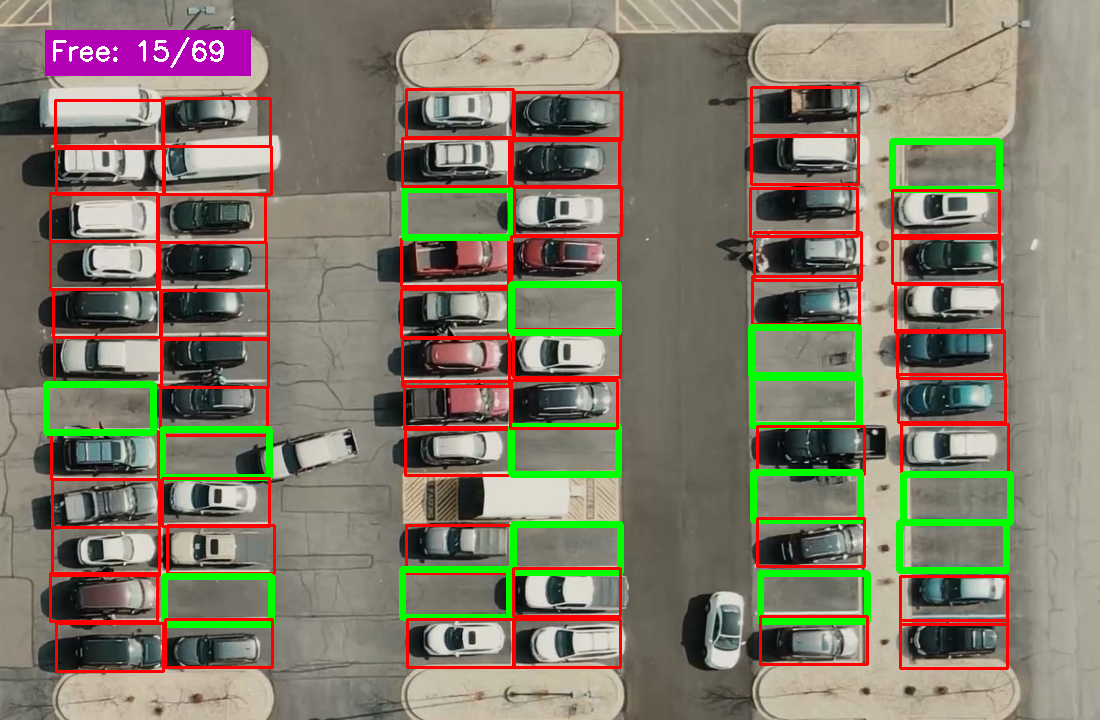

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
import cv2
import numpy as np
import pickle
from google.colab.patches import cv2_imshow

rectW, rectH = 107, 48

cap = cv2.VideoCapture('/content/img.png')

with open('CarParkPos', 'rb') as f:
    posList = pickle.load(f)

frame_counter = 0

# Initialize the background subtractor
bg_subtractor = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=50, detectShadows=False)

def check(imgPro, img):
    spaceCount = 0
    for pos in posList:
        x, y = pos
        crop = imgPro[y:y+rectH, x:x+rectW]
        count = cv2.countNonZero(crop)
        if count < 900:
            spaceCount += 1
            color = (0, 255, 0)
            thick = 5
        else:
            color = (0, 0, 255)
            thick = 2

        cv2.rectangle(img, pos, (x + rectW, y + rectH), color, thick)
    cv2.rectangle(img, (45, 30), (250, 75), (180, 0, 180), -1)
    cv2.putText(img, f'Free: {spaceCount}/{len(posList)}', (50, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)

while True:
    ret, img = cap.read()
    if not ret:
        break

    if frame_counter == cap.get(cv2.CAP_PROP_FRAME_COUNT):
        frame_counter = 0
        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

    # Apply background subtraction
    fg_mask = bg_subtractor.apply(img)

    # Apply some morphological operations to improve the foreground mask
    kernel = np.ones((3, 3), np.uint8)
    fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, kernel)
    fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_DILATE, kernel)

    check(fg_mask, img)

    cv2_imshow(img)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
